In [65]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split, KFold


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://www.kaggle.com/datasets/mehmetsabrikunt/internet-service-churn

Складається з 72275 рядків та 11 стовпців.

**id**: унікальний ідентифікатор абонента;

**is_tv_subscriber**: чи є у клієнта є підписка на телебачення?;

**is_movie_package_subscriber**: чи є підписка на кінопакети?;

**subscription_age**: скільки років клієнт користується нашими послугами;

**bill_avg**: середній рахунок за останні 3 місяці;

**reamining_contract**: скільки років залишилося до закінчення контракту користувача. Якщо ***null*** - клієнт не мав контракту. клієнт, який має контрактний час, повинен користуватися послугою до кінця контракту. якщо він відмовляється від послуги до закінчення контракту, він сплачує штрафний тариф. Є два способи, якими клієнт може користуватися послугами. Один - за допомогою контракту з обмеженим терміном дії, який коштує дешевше, а інший - за допомогою звичайної щомісячної підписки, яка, очевидно, коштує дорожче. Отже, навіть якщо людина не має контракту, вона все одно є користувачем, який сплачує щомісячні платежі;

**service_failure_coun**: кількість звернень клієнтів до колл-центру через збій обслуговування за останні 3 місяці;

**download_avg**: використання Інтернету за останні 3 місяці (ГБ);

**upload_avg**: середнє завантаження за останні 3 місяці (ГБ);

**download_over_limit**: більшість клієнтів мають обмеження на завантаження. якщо вони досягають цього ліміту, , вони повинні заплатити за це. ця колонка містить «перевищення ліміту» за останні 9 місяців;

***churn: відтік клієнта. Це цільова колонка, якщо 1 - клієнт скасував свою послугу***.




In [66]:
file_path = '/content/drive/My Drive/Colab Notebooks/Colab/Service Churn/internet_service_churn.csv'
df = pd.read_csv(file_path)

df

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [67]:
df.columns

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')

In [68]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [70]:
df.shape

(72274, 11)

In [71]:
df.duplicated().sum()

0

In [72]:
df.isnull().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,21572
service_failure_count,0
download_avg,381
upload_avg,381
download_over_limit,0


In [73]:
 df.duplicated().sum()

0

In [74]:
df['reamining_contract']

,reamining_contract
0,0.14
1,NaN
2,0.00
3,NaN
4,NaN
...,...
72269,1.25
72270,1.63
72271,2.19
72272,0.72


In [75]:
df.drop('id', axis='columns', inplace=True)
df

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
72269,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [76]:
correlation_matrix1 = df.corr()

# Виведення кореляції з цільовою змінною "churn"
churn_correlation1 = correlation_matrix1['churn'].sort_values(ascending=False)
print("Кореляція з цільовою змінною (churn):\n", churn_correlation1)

Кореляція з цільовою змінною (churn):
 churn                          1.000000
download_over_limit            0.158318
service_failure_count          0.021575
bill_avg                      -0.021058
subscription_age              -0.122441
upload_avg                    -0.162690
download_avg                  -0.298063
is_movie_package_subscriber   -0.307167
is_tv_subscriber              -0.327582
reamining_contract            -0.625450
Name: churn, dtype: float64


1. **reamining_contract (-0.681611)**
Сильна негативна кореляція.
Чим більше часу залишилося до закінчення контракту, тим менша ймовірність відтоку (churn = 1). Це логічно, оскільки клієнти з довгостроковими контрактами мають менше стимулів відмовлятися від послуги через штрафи.

2. **is_tv_subscriber (-0.327582)**
Помірна негативна кореляція.
Клієнти, які підписані на телебачення, менш схильні до відтоку. Це може свідчити про те, що вони задоволені послугами або більше інтегровані у систему.

3. **is_movie_package_subscriber (-0.307167)**
Помірна негативна кореляція.
Наявність підписки на кінопакети також зменшує ймовірність відтоку, можливо, через більшу задоволеність послугами.

4. **download_avg (-0.295554)**
Слабка до помірної негативна кореляція.
Чим більше клієнт використовує інтернет для завантаження даних, тим менша ймовірність відтоку. Це вказує на залученість у послугу.

5. **upload_avg (-0.162690)**
Слабка негативна кореляція.
Подібно до download_avg, активне використання інтернету для завантаження даних зменшує ймовірність відтоку.

6. **subscription_age (-0.122441)**
Слабка негативна кореляція.
Довгострокові клієнти менш схильні до відтоку, можливо, через звичку або задоволення послугами.

7. **bill_avg (-0.021058)**
Майже нульова кореляція.
Середній рахунок за останні 3 місяці майже не впливає на ймовірність відтоку.

8. **service_failure_count (0.021575)**
Майже нульова позитивна кореляція.
Кількість збоїв в обслуговуванні майже не впливає на ймовірність відтоку. Це може вказувати на те, що більшість клієнтів не скасовують послуги через тимчасові проблеми.

9. **download_over_limit (0.158318)**
Слабка позитивна кореляція.
Клієнти, які перевищують ліміт завантаження, частіше відмовляються від послуг, можливо, через додаткові витрати.

# ***Найбільш значущі фактори:***

reamining_contract: **cильний захисний фактор.**

is_tv_subscriber та is_movie_package_subscriber:**клієнти з додатковими послугами рідше йдуть.**

download_avg: **активні користувачі інтернету більш залучені та менш схильні до відтоку.**

# ***Мінімальний вплив:***

bill_avg та service_failure_count: незначна кореляція з відтоком.

***Можливості для вдосконалення:***

***Високий рівень download_over_limit може бути тригером для відтоку, тому варто дослідити, чи можна запропонувати клієнтам більш вигідні тарифні плани.***

In [77]:
# df['reamining_contract'].hist()

In [78]:
# df['download_avg'].hist()

In [79]:
# df['upload_avg'].hist()

In [80]:
# Замінюємо NaN в колонці reamining_contract на 0
df['reamining_contract'] = df['reamining_contract'].fillna(0)

In [81]:
# Замінюємо NaN у колонках download_avg та upload_avg на 0
# df['download_avg'] = df['download_avg'].fillna(0)
# df['upload_avg'] = df['upload_avg'].fillna(0)

df['download_avg'] = df['download_avg'].fillna(df['download_avg'].median())
df['upload_avg'] = df['upload_avg'].fillna(df['upload_avg'].median())


In [82]:
# df['reamining_contract'].hist()

In [83]:
# df['download_avg'].hist()

In [84]:
# df['upload_avg'].hist()

In [85]:
df

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,0,0,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
72269,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [86]:
correlation_matrix2 = df.corr()

churn_correlation2 = correlation_matrix2['churn'].sort_values(ascending=False)
print("Кореляція з цільовою змінною (churn):\n", churn_correlation2)

Кореляція з цільовою змінною (churn):
 churn                          1.000000
download_over_limit            0.158318
service_failure_count          0.021575
bill_avg                      -0.021058
subscription_age              -0.122441
upload_avg                    -0.160878
download_avg                  -0.295554
is_movie_package_subscriber   -0.307167
is_tv_subscriber              -0.327582
reamining_contract            -0.681611
Name: churn, dtype: float64


1. **reamining_contract (-0.681611)**
Сильна негативна кореляція.
Чим більше часу залишилося до закінчення контракту, тим менша ймовірність відтоку (churn = 1). Це логічно, оскільки клієнти з довгостроковими контрактами мають менше стимулів відмовлятися від послуги через штрафи.

2. **is_tv_subscriber (-0.327582)**
Помірна негативна кореляція.
Клієнти, які підписані на телебачення, менш схильні до відтоку. Це може свідчити про те, що вони задоволені послугами або більше інтегровані у систему.

3. **is_movie_package_subscriber (-0.307167)**
Помірна негативна кореляція.
Наявність підписки на кінопакети також зменшує ймовірність відтоку, можливо, через більшу задоволеність послугами.

4. **download_avg (-0.295554)**
Слабка до помірної негативна кореляція.
Чим більше клієнт використовує інтернет для завантаження даних, тим менша ймовірність відтоку. Це вказує на залученість у послугу.

5. **upload_avg (-0.160878)**
Слабка негативна кореляція.
Подібно до download_avg, активне використання інтернету для завантаження даних зменшує ймовірність відтоку.

6. **subscription_age (-0.122441)**
Слабка негативна кореляція.
Довгострокові клієнти менш схильні до відтоку, можливо, через звичку або задоволення послугами.

7. **bill_avg (-0.021058)**
Майже нульова кореляція.
Середній рахунок за останні 3 місяці майже не впливає на ймовірність відтоку.

8. **service_failure_count (0.021575)**
Майже нульова позитивна кореляція.
Кількість збоїв в обслуговуванні майже не впливає на ймовірність відтоку. Це може вказувати на те, що більшість клієнтів не скасовують послуги через тимчасові проблеми.

9. **download_over_limit (0.158318)**
Слабка позитивна кореляція.
Клієнти, які перевищують ліміт завантаження, частіше відмовляються від послуг, можливо, через додаткові витрати.

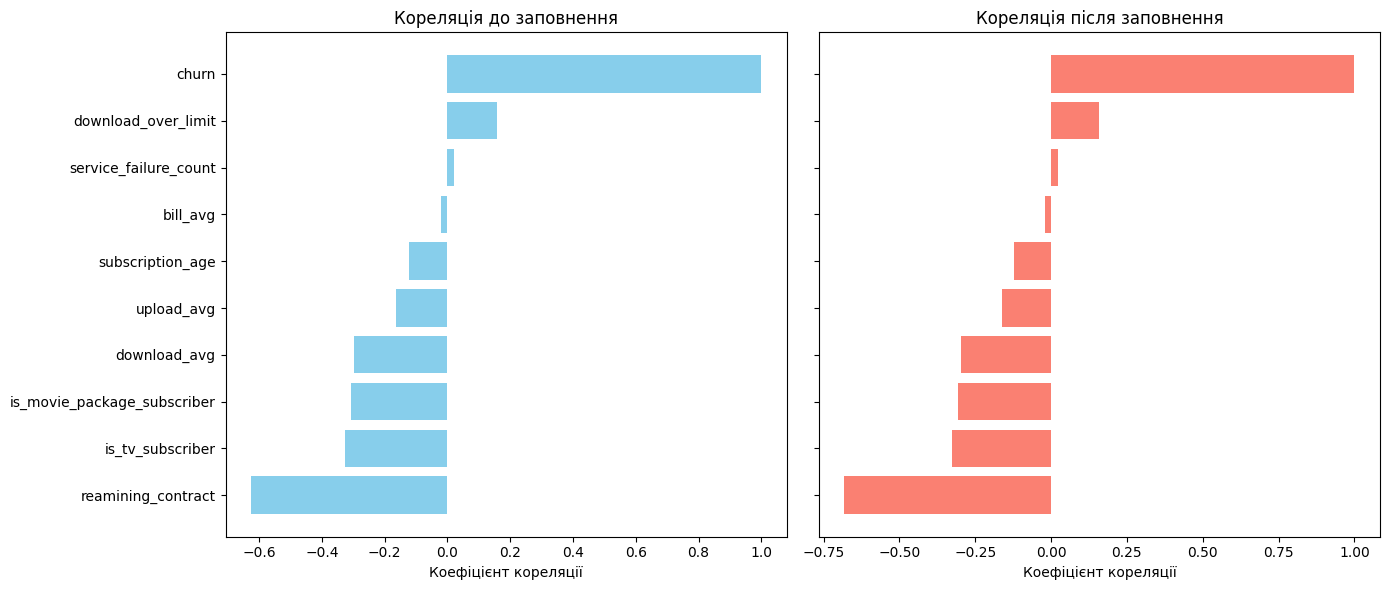

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Приклад даних для кореляцій до та після заповнення
churn_correlation1 = pd.Series({
    'churn': 1.000000,
    'download_over_limit': 0.158318,
    'service_failure_count': 0.021575,
    'bill_avg': -0.021058,
    'subscription_age': -0.122441,
    'upload_avg': -0.162690,
    'download_avg': -0.298063,
    'is_movie_package_subscriber': -0.307167,
    'is_tv_subscriber': -0.327582,
    'reamining_contract': -0.625450
})

# churn                          1.000000
# download_over_limit            0.158318
# service_failure_count          0.021575
# bill_avg                      -0.021058
# subscription_age              -0.122441
# upload_avg                    -0.162690
# download_avg                  -0.298063
# is_movie_package_subscriber   -0.307167
# is_tv_subscriber              -0.327582
# reamining_contract            -0.625450

churn_correlation2 = pd.Series({
    'churn': 1.000000,
    'download_over_limit':  0.158318,
    'service_failure_count': 0.021575,
    'bill_avg': -0.021058,
    'subscription_age': -0.122441,
    'upload_avg': -0.160878,
    'download_avg': -0.295554,
    'is_movie_package_subscriber': -0.307167,
    'is_tv_subscriber': -0.327582,
    'reamining_contract': -0.681611
})

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Графік для першої кореляції
axes[0].barh(churn_correlation1.index, churn_correlation1.values, color='skyblue')
axes[0].set_title('Кореляція до заповнення')
axes[0].set_xlabel('Коефіцієнт кореляції')
axes[0].invert_yaxis()

# Графік для другої кореляції
axes[1].barh(churn_correlation2.index, churn_correlation2.values, color='salmon')
axes[1].set_title('Кореляція після заповнення')
axes[1].set_xlabel('Коефіцієнт кореляції')

plt.tight_layout()
plt.show()

In [88]:
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ***RandomForestClassifier***

In [90]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9422345209270149


# ***LogisticRegression***

In [91]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_predictions = log_reg.predict(X_test_scaled)
log_accuracy = accuracy_score(y_test, log_predictions)
print(classification_report(y_test, log_predictions))


              precision    recall  f1-score   support

           0       0.89      0.81      0.85      6553
           1       0.85      0.92      0.89      7902

    accuracy                           0.87     14455
   macro avg       0.87      0.87      0.87     14455
weighted avg       0.87      0.87      0.87     14455



# ***GridSearchCV***

In [92]:
param_grid = {
    'n_estimators': [10, 50, 100, 200], #кількість дерев
    'max_depth': [None, 10, 20, 30], #максимальна глибина дерева
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] #мінімальна кількість зразків, що повинні бути в листі
}

In [93]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [94]:
gsbe = grid_search.best_estimator_
gsbe.predict(X_test_scaled)
print(classification_report(y_test, gsbe.predict(X_test_scaled)))


              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6553
           1       0.95      0.94      0.95      7902

    accuracy                           0.94     14455
   macro avg       0.94      0.94      0.94     14455
weighted avg       0.94      0.94      0.94     14455



In [95]:
from random import randint
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [randint(10, 200)],
    'max_depth': [None] + list(range(10, 31)),
    'min_samples_split': [randint(2, 11)],
    'min_samples_leaf': [randint(1, 5)]
}

In [96]:
randomized_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
randomized_search.fit(X_train_scaled, y_train)

best_params_random = randomized_search.best_params_
best_params_random

Fitting 5 folds for each of 22 candidates, totalling 110 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 22 is smaller than n_iter=100. Running 22 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 52,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': None}

In [103]:
rsbe = randomized_search.best_estimator_
rsbe.predict(X_test_scaled)
print(classification_report(y_test, rsbe.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6553
           1       0.95      0.94      0.95      7902

    accuracy                           0.94     14455
   macro avg       0.94      0.94      0.94     14455
weighted avg       0.94      0.94      0.94     14455

